<a href="https://colab.research.google.com/github/YesidCastelblanco/Taller_3_analisis_bivariado/blob/main/Taller_Analisis_Bivariado_Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## **Taller Analisis Bivariado**

---



El analisis bivariado es muy importante en la ciencia de datos porque nos permite entender y explorar una relación existente entre 2 variables del dataset, buscando una correlación que nos lleve a identificar en que medida se encuentran relacionadas.

Podemos detectar tendencias y patrones en los datos analizados mediante gráficos de barras, dispersión, entre otros, esto para visualizar como cambia una variable en relación con otra lo cual nos puede acercar a tendencias, anomalias presentes en la información consultada.

Debemos desarrollar modelos predictivos para identificar que variables tienen una fuerte relación con la variable objetivo.

Analizar como las variables se relacionan entre si, ayuda a confirmar el tipo de modelo a construir, por ejemplo, una regresión lineal, regresión logística, entre otros modelos.


---





---


***Dataset CLIENTES EN ESTADO DE MORA AÑO 2022- 2024***


---






Trabajaremos con un archivo CSV el cual contiene información de clientes de una entidad financiera que se encuentran con un estado de mora.

Se evidencia un problema importante por el alto volumen de cartera castigada lo cual ha venido incrementando año tras año y se desea conocer que variables influyen en ese comportamiento.

En este archivo encontraremos datos financieros como es el total de los ingresos,egresos, saldos del cliente, plazo del credito, dias de mora,categoria de mora,igualmente, datos basicos del cliente como es el estado civil, sexo, tipo de vivienda, edad y personas a cargo.  


---




***PASO A PASO ANALISIS BIVARIADO***


---



In [2]:
# Importamos las bibliotecas necesarias para el analisis exploratorio

# Biblioteca para manipulación y análisis de datos estructurados
import pandas as pd

# Biblioteca para cálculos numéricos y manipulación de datos
import numpy as np

# Biblioteca para la creación de gráficos básicos y visualizaciones de datos
import matplotlib.pyplot as plt

# Proporciona una interfaz de alto nivel para crear gráficos estadísticos y más complejos
import seaborn as sns

# Útiles para evaluar el rendimiento de un modelo de clasificación
from sklearn.metrics import accuracy_score, confusion_matrix

# Modelo lineal de regresión logística que se utiliza para predecir la probabilidad de una clase o evento en función de una o más variables independientes
from sklearn.linear_model import LogisticRegression

# Se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Se utiliza para imputar valores faltantes en un conjunto de datos
from sklearn.impute import KNNImputer




---


***CARGAMOS ARCHIVO CSV SIN ENCABEZADO***


---



In [3]:
# Leer un archivo CSV y cargarlo en un DataFrame de Pandas

df = pd.read_csv('https://raw.githubusercontent.com/YesidCastelblanco/Dataset_clientes_mora/main/Dataset_mora.csv')



---


***CREAMOS EL ENCABEZADO PARA CADA UNA DE LAS VARIABLES A UTILIZAR***


---



In [4]:
# Definimos los encabezados del Dataset

headers = ["SEXO","ESTADO_CIVIL","VIVIENDA","EDAD","INGRESOS","EGRESOS","DEPENDIENTES","PLAZO","SALDO_CREDITO","MORA","CLASIFICACION_MORA"]

df.columns = headers

print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI



---


**Consultamos las primeras (#) filas del dataset**


---



In [4]:

df.head(10)


,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
0,MUJER,SOLTERO,FAMILIAR,47,4966896,4000000,0,72,41220000,481,D
1,HOMBRE,CASADO,PROPIA,33,16213150,2000000,0,72,198900000,24,A
2,MUJER,SOLTERO,FAMILIAR,43,1342547,12908,0,122,44300000,555,E
3,HOMBRE,UNION LIBRE,FAMILIAR,54,3106656,18717162,0,61,308081700,53,D
4,HOMBRE,SOLTERO,FAMILIAR,31,200000000,2000000,1,60,121120000,22,A
5,HOMBRE,CASADO,PROPIA,46,7640000,4500000,0,48,35300000,480,E
6,HOMBRE,UNION LIBRE,FAMILIAR,37,2266188,1163135,0,140,73100000,433,E
7,HOMBRE,SOLTERO,PROPIA,47,4247963,2053349,1,140,200000000,36,A
8,HOMBRE,CASADO,PROPIA,63,761428,201322,0,60,23965000,204,E
9,HOMBRE,CASADO,PROPIA,72,3539425,1969776,0,60,12147000,449,E


---


**Consultamos las ultimas (#) filas del dataset**


---

In [5]:

df.tail(10)

,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA
586,HOMBRE,SOLTERO,FAMILIAR,38,2306507,791406,0,120,79500000,463,E
587,MUJER,SOLTERO,PROPIA,60,1069192,352448,0,120,48000000,36,A
588,MUJER,SEPARADO,FAMILIAR,60,2425592,1332126,0,140,102000000,341,E
589,MUJER,CASADO,PROPIA,48,3480000,31360000,0,72,168000000,80,D
590,MUJER,SOLTERO,FAMILIAR,52,2671586,967636,0,120,50000000,645,E
591,MUJER,SOLTERO,FAMILIAR,65,3094027,310000,0,60,27000000,475,E
592,HOMBRE,SOLTERO,FAMILIAR,33,2010394,723341,0,140,59700000,158,D
593,MUJER,SOLTERO,FAMILIAR,50,1791871,988381,0,140,57000000,67,B
594,HOMBRE,SOLTERO,FAMILIAR,35,2153146,1084469,0,140,75000000,614,E
595,HOMBRE,SOLTERO,PROPIA,31,1977665,1173382,0,140,51500000,280,E




---


***CONSULTAMOS EL TIPO DE DATOS DE LAS VARIABLES DEL DATAFRAME***


---



In [7]:
# Consultamos los tipos de datos de las variables en el DataFrame para poder decidir métodos adecuados para la visualización de los datos mediante analisis bivariado

df.dtypes

# Pandas almacena las variables categóricas como 'object' y las variables continuas se almacenan como int o float


,0
SEXO,object
ESTADO_CIVIL,object
VIVIENDA,object
EDAD,int64
INGRESOS,int64
EGRESOS,int64
DEPENDIENTES,int64
PLAZO,int64
SALDO_CREDITO,int64
MORA,int64




---


***VISUALIZACIÓN DE LOS DATOS DEL DATAFRAME***



---




In [8]:
# Resumen del Dataframe útil para depuración y comprensión inicial de los datos
# Podemos ver cuántos valores no nulos hay en cada columna lo que ayuda a identificar la presencia de valores faltantes.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SEXO                596 non-null    object
 1   ESTADO_CIVIL        595 non-null    object
 2   VIVIENDA            592 non-null    object
 3   EDAD                596 non-null    int64 
 4   INGRESOS            596 non-null    int64 
 5   EGRESOS             596 non-null    int64 
 6   DEPENDIENTES        596 non-null    int64 
 7   PLAZO               596 non-null    int64 
 8   SALDO_CREDITO       596 non-null    int64 
 9   MORA                596 non-null    int64 
 10  CLASIFICACION_MORA  596 non-null    object
dtypes: int64(7), object(4)
memory usage: 51.3+ KB




---


***Caracteristicas estadisticas del dataframe***


---



In [11]:
# Mostrar caracteristicas estadísticas de los datos en un DataFrame para identificar anomalias o patrones

df.describe()

# count: Número de valores no nulos en la columna
# mean: Media de los valores en la columna
# std: Desviación estándar de los valores en la columna
# min: Valor mínimo en la columna
# 25%: Primer cuartil (25th percentile)
# 50%: Mediana (50th percentile)
# 75%: Tercer cuartil (75th percentile)
# max: Valor máximo en la columna

# PARA VARIABLES CATEGÓRICAS:

# unique: valores unicos
# top: valores mas comunes, los que mas se repiten
# freq: frecuencia de los valores mas comunes


,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA
count,596.000000,5.960000e+02,5.960000e+02,596.000000,596.000000,5.960000e+02,596.000000
mean,45.573826,1.573884e+07,9.379276e+06,0.362416,95.771812,7.155391e+07,287.793624
std,12.503831,1.476983e+08,7.207173e+07,4.389008,39.814844,1.714423e+08,268.505154
min,14.000000,0.000000e+00,0.000000e+00,0.000000,18.000000,1.966634e+06,1.000000
25%,36.000000,1.559405e+06,5.116410e+05,0.000000,60.000000,3.000000e+07,36.000000
50%,43.000000,2.137788e+06,1.000000e+06,0.000000,74.500000,5.548337e+07,218.000000
75%,53.000000,3.499719e+06,1.527788e+06,0.000000,140.000000,7.807500e+07,494.000000
max,83.000000,2.764298e+09,1.183283e+09,99.000000,225.000000,4.000000e+09,934.000000


---


***Caracteristicas estadisticas del dataframe por columna***


---

In [12]:
# Analizamos cada una de las variables descriptivas

print(df['SEXO'].describe())
print(df['ESTADO_CIVIL'].describe())
print(df['VIVIENDA'].describe())
print(df['EDAD'].describe())
print(df['INGRESOS'].describe())
print(df['EGRESOS'].describe())
print(df['DEPENDIENTES'].describe())
print(df['PLAZO'].describe())
print(df['SALDO_CREDITO'].describe())
print(df['MORA'].describe())
print(df['CLASIFICACION_MORA'].describe())


count        596
unique         2
top       HOMBRE
freq         430
Name: SEXO, dtype: object
count         595
unique          7
top       SOLTERO
freq          270
Name: ESTADO_CIVIL, dtype: object
count          592
unique           3
top       FAMILIAR
freq           311
Name: VIVIENDA, dtype: object
count    596.000000
mean      45.573826
std       12.503831
min       14.000000
25%       36.000000
50%       43.000000
75%       53.000000
max       83.000000
Name: EDAD, dtype: float64
count    5.960000e+02
mean     1.573884e+07
std      1.476983e+08
min      0.000000e+00
25%      1.559405e+06
50%      2.137788e+06
75%      3.499719e+06
max      2.764298e+09
Name: INGRESOS, dtype: float64
count    5.960000e+02
mean     9.379276e+06
std      7.207173e+07
min      0.000000e+00
25%      5.116410e+05
50%      1.000000e+06
75%      1.527788e+06
max      1.183283e+09
Name: EGRESOS, dtype: float64
count    596.000000
mean       0.362416
std        4.389008
min        0.000000
25%        0.0



---


***NUMERO DE COLUMNAS Y NUMERO DE FILAS DEL DATAFRAME***


---



In [13]:
# Obtener información sobre dimensiones de un DataFrame

df.shape

# (filas, columnas)


(596, 11)

---


***Frecuencia relativa (proporción) de cada valor en la columna***


---

In [22]:
# Calculamos las proporciones relativas de la columna MORA

Proporcion = df['MORA'].value_counts("normalize = True")
print(Proporcion)

MORA
5      0.109060
36     0.036913
767    0.023490
97     0.023490
433    0.021812
         ...   
251    0.001678
60     0.001678
471    0.001678
805    0.001678
475    0.001678
Name: proportion, Length: 237, dtype: float64


---


***Agrupar clientes por cantidad de mora***


---

In [23]:
# Primero, agrupamos el número de dias de mora

df['MORA'].value_counts()

,count
MORA,
5,65
36,22
767,14
97,14
433,13
...,...
251,1
60,1
471,1




---


***LIMPIEZA DE LOS DATOS***


---



***Valores perdidos***


---



identificamos donde se encuentran los valores perdidos y cual es el mejor método para tratarlos.

Podemos tratar estos valores perdidos por medio de tecnicas de imputación

Imputación de datos: sustituir los valores perdidos empleando: media, mediana o moda.


***Vamos a revisar si el campo objetivo MORA tiene valores perdidos***

In [15]:
# Primero vamos a contar los valores no numéricos dentro del campo MORA

# Esta validación sólo funciona con cadenas (strings). Como la columna es numérica, tenemos que convertirla a cadena:

df['MORA'] = df['MORA'].astype(str)

# después de convertir los datos del campo MORA en Strings, podemos realizar la validación de los campos no numéricos

df['MORA'].str.isnumeric().value_counts()


,count
MORA,
True,596


**Según el resultado obtenido, el campo mora no tiene valores perdidos ya que la base es de 596 registros**



---


***CALCULAMOS LA MEDIA PARA ASIGNARLE A CAMPO QUE CONTIENE DATOS INCORRECTOS***


---



In [26]:
# Calcular la media de los valores numéricos

# Filtrar los valores diferentes de '?'
MORA = df['MORA'].loc[df['MORA'] != '?']

# Calcular la media de los valores numéricos
mmean = MORA.astype(int).mean()
print("La media de los valores numéricos es:", mmean)


La media de los valores numéricos es: 287.8307952622673




---


***Convertir a Tipo de Datos Correcto***


---



Después de calcular la media, si necesitamos imputar valores en MORA, se puede reemplazar "?" con la media calculada y luego convertir la columna a un tipo de dato numérico.

En pandas utilizamos los métodos: .dtype() para ver los tipos de datos, y .astype() para cambiar tipos de datos. Tambien podemos utilizar pd.to_numeric para cambiar a número



In [27]:
# Reemplazar '?' con la media y convertir a entero

df['MORA'] = df['MORA'].replace('?', mmean)
df['MORA'] = pd.to_numeric(df['MORA'])

# Mostrar los primeros valores de la columna 'MORA'
print(df['MORA'].head())

0    481
1     24
2    555
3     53
4     22
Name: MORA, dtype: int64




---


***Igualmente, podemos reemplazar los valores "NaN"***


---



In [28]:
# Reemplazo de NaN por la media, columna MORA

df["MORA"].replace(np.nan, mmean, inplace=True)
df.head(10)

,SEXO,ESTADO_CIVIL,VIVIENDA,EDAD,INGRESOS,EGRESOS,DEPENDIENTES,PLAZO,SALDO_CREDITO,MORA,CLASIFICACION_MORA,CATEGORIA_INGRESOS,CATEGORIA_PLAZO,CATEGORIA_EDAD,CATEGORIA_EGRESOS,CATEGORIA_SALDO,CATEGORIA_MORA
0,MUJER,SOLTERO,FAMILIAR,47,4966896.0,4000000.0,0,72,41220000,481,D,Media,plazo alto,segunda edad,Alto,saldo_medio,mora_alta
1,HOMBRE,CASADO,PROPIA,33,16213150.0,2000000.0,0,72,198900000,24,A,Alta,plazo alto,segunda edad,Medio,saldo_alto,mora_baja
2,MUJER,SOLTERO,FAMILIAR,43,1342547.0,12908.0,0,122,44300000,555,E,Media,plazo alto,segunda edad,Bajo,saldo_medio,mora_alta
3,HOMBRE,UNION LIBRE,FAMILIAR,54,3106656.0,18717162.0,0,61,308081700,53,D,Media,plazo alto,segunda edad,Alto,saldo_alto,mora_baja
4,HOMBRE,SOLTERO,FAMILIAR,31,200000000.0,2000000.0,1,60,121120000,22,A,Alta,plazo medio,segunda edad,Medio,saldo_alto,mora_baja
5,HOMBRE,CASADO,PROPIA,46,7640000.0,4500000.0,0,48,35300000,480,E,Alta,plazo medio,segunda edad,Alto,saldo_medio,mora_alta
6,HOMBRE,UNION LIBRE,FAMILIAR,37,2266188.0,1163135.0,0,140,73100000,433,E,Media,plazo alto,segunda edad,Medio,saldo_alto,mora_alta
7,HOMBRE,SOLTERO,PROPIA,47,4247963.0,2053349.0,1,140,200000000,36,A,Media,plazo alto,segunda edad,Medio,saldo_alto,mora_baja
8,HOMBRE,CASADO,PROPIA,63,761428.0,201322.0,0,60,23965000,204,E,Baja,plazo medio,tercera edad,Bajo,saldo_medio,mora_media
9,HOMBRE,CASADO,PROPIA,72,3539425.0,1969776.0,0,60,12147000,449,E,Media,plazo medio,tercera edad,Medio,saldo_medio,mora_alta




---


***Otros ejemplos de calculo de la media de los campos INGRESOS y EGRESOS***


---



In [29]:
# Media de las columnas INGRESOS y EGRESOS

# Media de la columna INGRESOS
INGRESOS = df["INGRESOS"].astype("float").mean()

# Media de la columna EGRESOS
EGRESOS = df["EGRESOS"].astype("float").mean()

# Imprimir los resultados
print("Promedio de ingresos:", INGRESOS)
print("Promedio de egresos:", EGRESOS)

Promedio de ingresos: 7932180.392156863
Promedio de egresos: 5760259.891608392


# ***IMPUTACIÓN AVANZADA***

Utilizamos técnicas más avanzadas como la imputación basada en k-vecinos más cercanos (KNN)



---


***Importamos y configuramos el Imputer***


---



In [30]:
# KNNImputer de sklearn para imputar valores nulos en la columna del DataFrame.
# Este es un enfoque útil cuando se quiere utilizar la información de los valores vecinos para estimar los valores faltantes.

# n_neighbors: Especifica el número de vecinos más cercanos que se usarán para calcular el valor imputado. En este caso, se van a usar 5 vecinos.
# weights: Determina si se deben usar pesos uniformes o ponderar por la distancia.
# "uniform" significa que todos los vecinos tienen el mismo peso. También se puede usar "distance" para ponderar según la distancia.

# Aseguramos que el campo sea numérico:

# convertir cualquier valor no numérico a NaN antes de imputar. Utilizamos pd.to_numeric con errors='coerce' para convertir valores no numéricos a NaN

df['MORA'] = pd.to_numeric(df['MORA'], errors='coerce')


In [31]:
# Creamos el imputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')




---


***Entrenamos el Imputer***


---



El imputer necesita al menos un valor válido para calcular la imputación. Se debe asegurar que el DataFrame df no contenga valores no numéricos o faltantes antes de aplicar fit.


In [32]:
# Entrenamos el modelo, ajustamos el imputer a los datos de la columna "MORA"

imputer.fit(df[["MORA"]])


KNNImputer()



---


***Imputar los valores Nulos***


---



Transformamos los datos utilizando el imputer para reemplazar los valores nulos. El método transform devuelve una matriz, por lo que se utiliza ravel() para convertirla en un vector plano y reemplazar los valores en la columna original.

In [33]:
# Reemplazamos los valores nulos en la columna "MORA"

df["MORA"] = imputer.transform(df[["MORA"]]).ravel()




---


***CONSULTA VALORES NULOS***


---



Después de imputar, verificamos que no hayan valores nulos restantes y que los datos sean coherentes.

Este enfoque permitirá manejar los valores faltantes en la columna MORA de manera efectiva utilizando información de los vecinos más cercanos.

In [34]:
# Verificar si aún hay valores nulos
print(df["MORA"].isnull().sum())

# Verificar algunos valores
print(df["MORA"].head())

# Verificar si hay valores NaN restantes
print("Valores NaN en el DataFrame:")
print(df.isna().sum())


0
0    481.0
1     24.0
2    555.0
3     53.0
4     22.0
Name: MORA, dtype: float64
Valores NaN en el DataFrame:
SEXO                 0
ESTADO_CIVIL         0
VIVIENDA             0
EDAD                 0
INGRESOS             0
                    ..
CATEGORIA_PLAZO      0
CATEGORIA_EDAD       0
CATEGORIA_EGRESOS    0
CATEGORIA_SALDO      0
CATEGORIA_MORA       0
Length: 17, dtype: int64




---


***Reemplazar caracteres especiales encontrados en el Dataframe***


---



Podemos realizar un reemplazo de caracteres especiales con la función replace, para hacer uso de la función es necesario tener cargada la libreria numpy

In [25]:
# Reemplaza todas las ocurrencias de "?" en el DataFrame df con np.nan.
# La opción inplace=True modifica el DataFrame directamente, sin necesidad de asignar el resultado a una nueva variable.

# Esto transformará el DataFrame para que los valores "?" sean tratados como datos faltantes (NaN)

df.replace("?", np.nan, inplace=True)

# Verificamos que los valores se hayan reemplazado correctamente:

print("\nDataFrame después de reemplazar '?' con NaN:")
print(df)



DataFrame después de reemplazar '?' con NaN:
       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD     INGRESOS     EGRESOS  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896.0   4000000.0   
1    HOMBRE        CASADO    PROPIA    33   16213150.0   2000000.0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547.0     12908.0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656.0  18717162.0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000.0   2000000.0   
..      ...           ...       ...   ...          ...         ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027.0    310000.0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394.0    723341.0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871.0    988381.0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146.0   1084469.0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665.0   1173382.0   

     DEPENDIENTES  PLAZO  SALDO_CREDITO  MORA CLASIFICACION_MORA  \
0               0     72       41220000   481



---


***Consultamos los valores perdidos:***


---



El código missing_data = df.isnull() en pandas se usa para identificar los valores faltantes (NaN) en un DataFrame

In [35]:
# df.isnull(): Devuelve un DataFrame del mismo tamaño que df, donde cada valor es True si el valor correspondiente en df es NaN o None, y False en caso contrario.
# missing_data = df.isnull(): Asigna el DataFrame de valores booleanos (True o False) a la variable missing_data

# True" significa valor perdido, "False" significa valor no perdido

missing_data = df.isnull()
print(missing_data)

      SEXO  ESTADO_CIVIL  VIVIENDA   EDAD  INGRESOS  EGRESOS  DEPENDIENTES  \
0    False         False     False  False     False    False         False   
1    False         False     False  False     False    False         False   
2    False         False     False  False     False    False         False   
3    False         False     False  False     False    False         False   
4    False         False     False  False     False    False         False   
..     ...           ...       ...    ...       ...      ...           ...   
591  False         False     False  False     False    False         False   
592  False         False     False  False     False    False         False   
593  False         False     False  False     False    False         False   
594  False         False     False  False     False    False         False   
595  False         False     False  False     False    False         False   

     PLAZO  SALDO_CREDITO   MORA  CLASIFICACION_MORA  CATEGORIA

In [36]:
# Contamos los valores faltantes

missing_count = df.isnull().sum()
print(missing_count)


SEXO                 0
ESTADO_CIVIL         0
VIVIENDA             0
EDAD                 0
INGRESOS             0
                    ..
CATEGORIA_PLAZO      0
CATEGORIA_EDAD       0
CATEGORIA_EGRESOS    0
CATEGORIA_SALDO      0
CATEGORIA_MORA       0
Length: 17, dtype: int64


<Axes: >

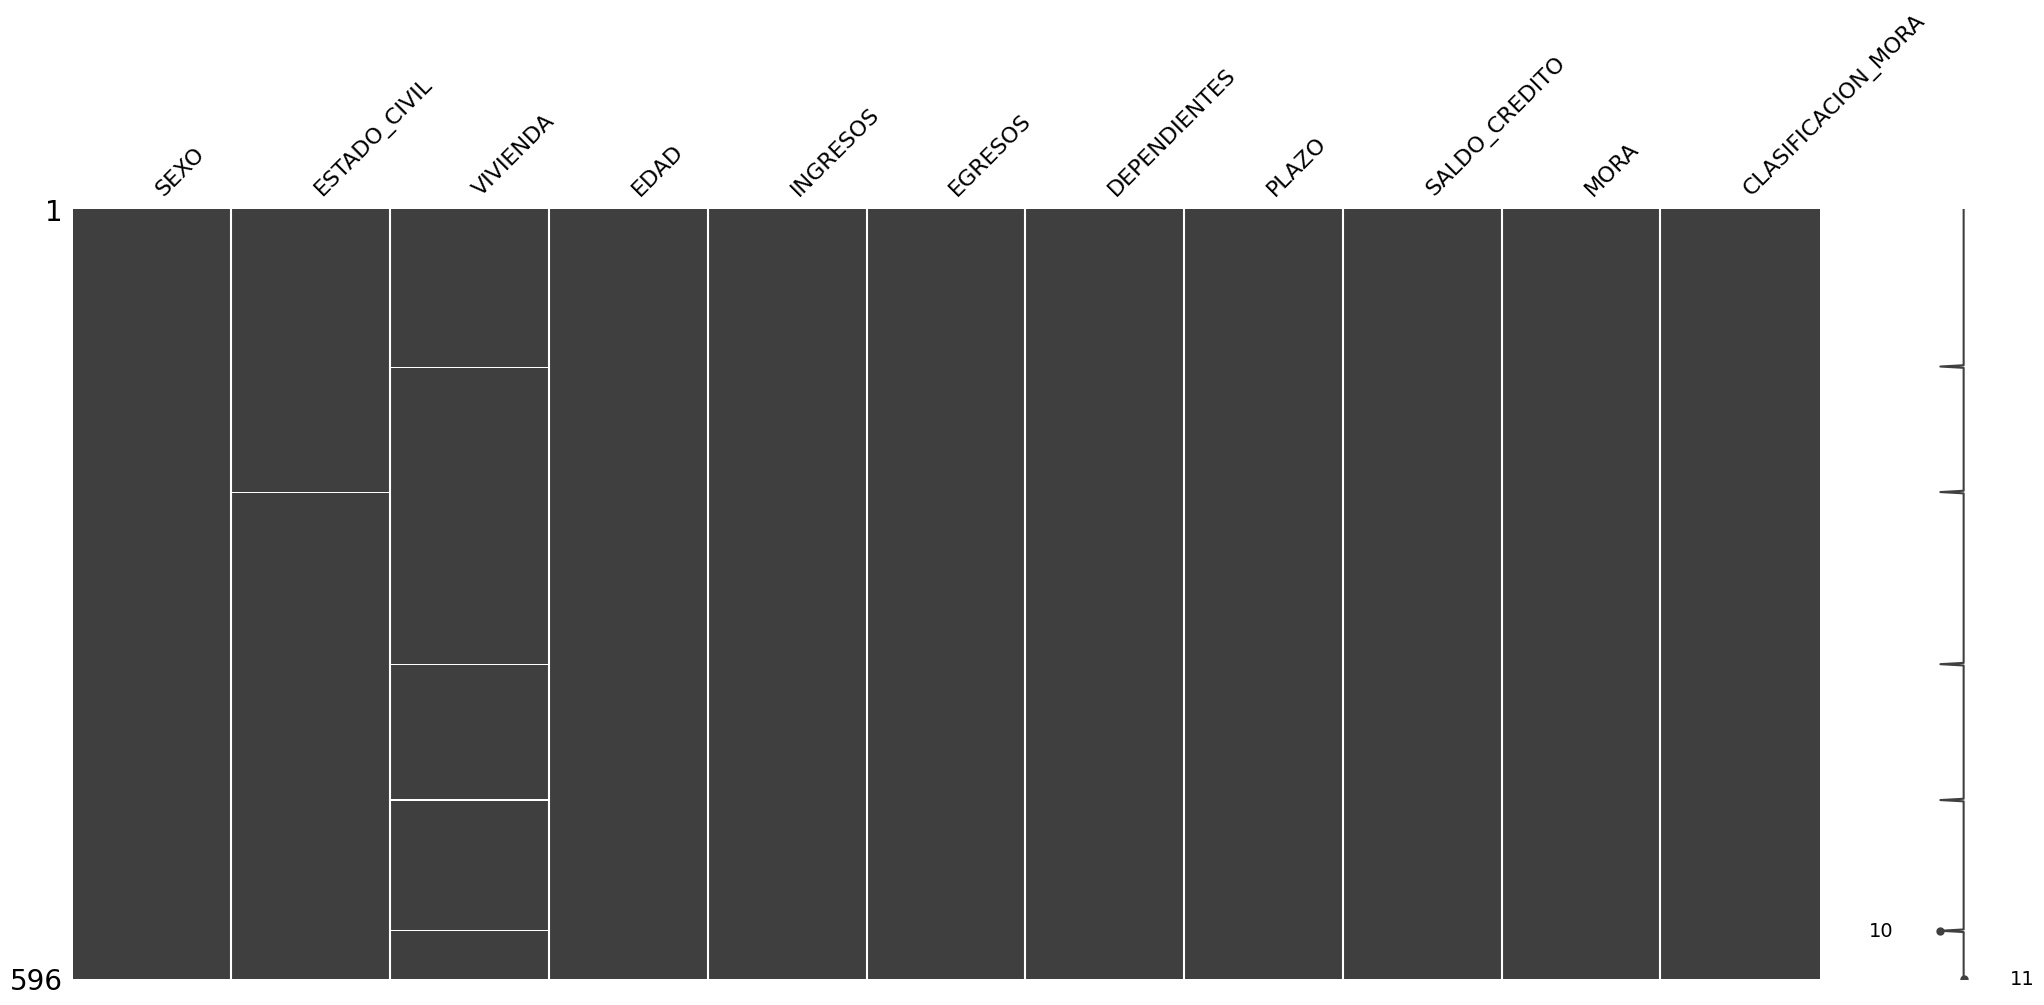

In [40]:
# Visualizar Datos Faltantes

# visualizar la distribución de datos faltantes. Puedes usar bibliotecas como missingno para crear gráficos
# Esto dará una visualización gráfica de la distribución de valores faltantes en el DataFrame.

import missingno as msno
msno.matrix(df)




---


***Tambien podemos mostrar la suma de valores perdidos y no perdidos por variable***


---



In [41]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

SEXO
False    596
Name: count, dtype: int64

ESTADO_CIVIL
False    595
True       1
Name: count, dtype: int64

VIVIENDA
False    592
True       4
Name: count, dtype: int64

EDAD
False    596
Name: count, dtype: int64

INGRESOS
False    596
Name: count, dtype: int64

EGRESOS
False    596
Name: count, dtype: int64

DEPENDIENTES
False    596
Name: count, dtype: int64

PLAZO
False    596
Name: count, dtype: int64

SALDO_CREDITO
False    596
Name: count, dtype: int64

MORA
False    596
Name: count, dtype: int64

CLASIFICACION_MORA
False    596
Name: count, dtype: int64



**NOTA:**   Debemos tomar decisiones en cuanto a como manejar los valores perdidos encontrados en nuestro dataframe, esto quiere decir, considerar diferentes opciones de limpieza de nuestra información sin afectar los resultados de la investigación.




---


***REEMPLAZAR VALORES EN 0 POR LA MEDIA"***


---



In [23]:
# Calculamos el valor de la media excluyendo los valores en 0

INGRESOS_mean = df['INGRESOS'][df['INGRESOS'] != 0].mean()
EGRESOS_mean = df['EGRESOS'][df['EGRESOS'] != 0].mean()

# Reemplazamos los valores en 0 en la variable 'INGRESOS' por la media calculada

df['INGRESOS'] = df['INGRESOS'].replace(0, INGRESOS_mean)

# Reemplazamos los valores en 0 en la variable 'EGRESOS' por la media calculada
df['EGRESOS'] = df['EGRESOS'].replace(0, EGRESOS_mean)

# Verificamos los cambios realizados
print(df['INGRESOS'].describe())
print(df['EGRESOS'].describe())


count    5.910000e+02
mean     7.932180e+06
std      3.630860e+07
min      1.000000e+00
25%      1.729970e+06
50%      2.232453e+06
75%      4.000000e+06
max      6.000000e+08
Name: INGRESOS, dtype: float64
count    5.910000e+02
mean     5.760260e+06
std      2.895519e+07
min      1.000000e+00
25%      6.035015e+05
50%      1.023760e+06
75%      1.653548e+06
max      4.253156e+08
Name: EGRESOS, dtype: float64




---


***Consultar la cantidad de valores faltantes en el DataFrame por campo***


---



In [43]:
#  identificar y contar la cantidad de valores faltantes (NaN o None) en el DataFrame df

df.isna().sum()


,0
SEXO,0
ESTADO_CIVIL,1
VIVIENDA,4
EDAD,0
INGRESOS,0
EGRESOS,0
DEPENDIENTES,0
PLAZO,0
SALDO_CREDITO,0
MORA,0




---


***Consultar la cantidad total de valores faltantes en el DataFrame ***


---



In [22]:
# suma de valores faltantes de todas las columnas

df.isna().sum().sum()

0



---


***ELIMINAR FILAS CON NaN***


---



Por defecto, dropna() elimina cualquier fila que contenga al menos un valor NaN. Tenemos que analizar si la fila que deseamos eliminar no afecta el resultado esperado de la investigación, es decir, la fila no aporta información importante

In [37]:
# elimina todas las filas del DataFrame df que tienen al menos un valor faltante (NaN)

df.dropna(subset=["VIVIENDA"], axis=0, inplace=True)
df.dropna(subset=["ESTADO_CIVIL"], axis=0, inplace=True)


*Consultamos nuevamente la cantidad de valores faltantes despues de aplicar la eliminación*

In [46]:
# verificar la cantidad de valores faltantes (NaN o None) en cada columna del DataFrame

df.isna().sum()

,0
SEXO,0
ESTADO_CIVIL,0
VIVIENDA,0
EDAD,0
INGRESOS,0
EGRESOS,0
DEPENDIENTES,0
PLAZO,0
SALDO_CREDITO,0
MORA,0


*Restablecer el indice del dataframe despues de la eliminación de las filas*

In [47]:
df.reset_index(drop=True, inplace=True)



---


***SI QUEREMOS REALIZAR UNA OPERACION A UN CAMPO DEL DATAFRAME Y RENOMBRAR LA COLUMNA***


---



In [38]:
# Agregar calculo a un campo del dataframa

df['INGRESOS AJUSTE'] = df["INGRESOS AJUSTE"]*2
df['EGRESOS AJUSTE'] = df["EGRESOS AJUSTE"]*2

# Renombrar la columna

df.rename(columns={'INGRESOS AJUSTE':'INGRESOS'}, inplace=True)
df.rename(columns={'EGRESOS AJUSTE':'EGRESOS'}, inplace=True)

# Consultamos los ajustes
df.head()

KeyError: 'INGRESOS AJUSTE'

---

**CREACIÓN CAMPOS "CATEGORIA"**


---

In [5]:
# Crea una nueva columna ' CATEGORIA TOTAL INGRESOS' y se asignamos una categoria de acuerdo con un rango
# pd.cut: Es una función de pandas utilizada para segmentar y clasificar valores en categorías basadas en intervalos especificados
# bins=[-np.inf (menos infinito), 1.000.000, 3.000.000, np.inf(mas infinito)]: Estos son los límites de los intervalos en los que se dividen los datos de la columna
# -np.inf (menos infinito) hasta 1.000.000 define el primer intervalo
# mayores de 1.000.000 hasta 5.000.000 define el segundo intervalo.
# mayores de 5.000.000 hasta np.inf (más infinito) define el tercer intervalo.
# labels=['Baja', 'Media', 'Alta']

df['CATEGORIA_INGRESOS'] = pd.cut(df['INGRESOS'], bins=[-np.inf, 1000000, 5000000, np.inf], labels=['Baja', 'Media', 'Alta'])

# Muestra el DataFrame con la nueva columna
pd.set_option('display.max_rows', 10)
print(df)

       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI



---


Igualmente, creamos las demas categorias para los campos numéricos, esto con el fin de poder analizar la información de una manera mas sencilla debido a la cantidad de registros únicos.


---



In [6]:
df['CATEGORIA_PLAZO'] = pd.cut(df['PLAZO'], bins=[-np.inf, 24, 60, np.inf], labels=['plazo bajo', 'plazo medio', 'plazo alto'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_EDAD'] = pd.cut(df['EDAD'], bins=[-np.inf, 30, 60, np.inf], labels=['primera edad', 'segunda edad', 'tercera edad'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_EGRESOS'] = pd.cut(df['EGRESOS'], bins=[-np.inf, 1000000, 3000000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_SALDO'] = pd.cut(df['SALDO_CREDITO'], bins=[-np.inf, 10000000, 50000000, np.inf], labels=['saldo_bajo', 'saldo_medio', 'saldo_alto'])

# Muestra el DataFrame con la nueva columna
print(df)


df['CATEGORIA_MORA'] = pd.cut(df['MORA'], bins=[-np.inf, 100, 300, np.inf], labels=['mora_baja', 'mora_media', 'mora_alta'])

# Muestra el DataFrame con la nueva columna
print(df)


       SEXO  ESTADO_CIVIL  VIVIENDA  EDAD   INGRESOS   EGRESOS  DEPENDIENTES  \
0     MUJER       SOLTERO  FAMILIAR    47    4966896   4000000             0   
1    HOMBRE        CASADO    PROPIA    33   16213150   2000000             0   
2     MUJER       SOLTERO  FAMILIAR    43    1342547     12908             0   
3    HOMBRE  UNION LIBRE   FAMILIAR    54    3106656  18717162             0   
4    HOMBRE       SOLTERO  FAMILIAR    31  200000000   2000000             1   
..      ...           ...       ...   ...        ...       ...           ...   
591   MUJER       SOLTERO  FAMILIAR    65    3094027    310000             0   
592  HOMBRE       SOLTERO  FAMILIAR    33    2010394    723341             0   
593   MUJER       SOLTERO  FAMILIAR    50    1791871    988381             0   
594  HOMBRE       SOLTERO  FAMILIAR    35    2153146   1084469             0   
595  HOMBRE       SOLTERO    PROPIA    31    1977665   1173382             0   

     PLAZO  SALDO_CREDITO  MORA CLASIFI

# ***GRAFICOS PARA ANALISIS ESTADISTICO BIVARIADO***



---


***Gráfico de Dispersión (Scatter Plot)***


---
Un gráfico de dispersión muestra la relación entre dos variables numéricas. Es útil para visualizar la correlación y detectar patrones

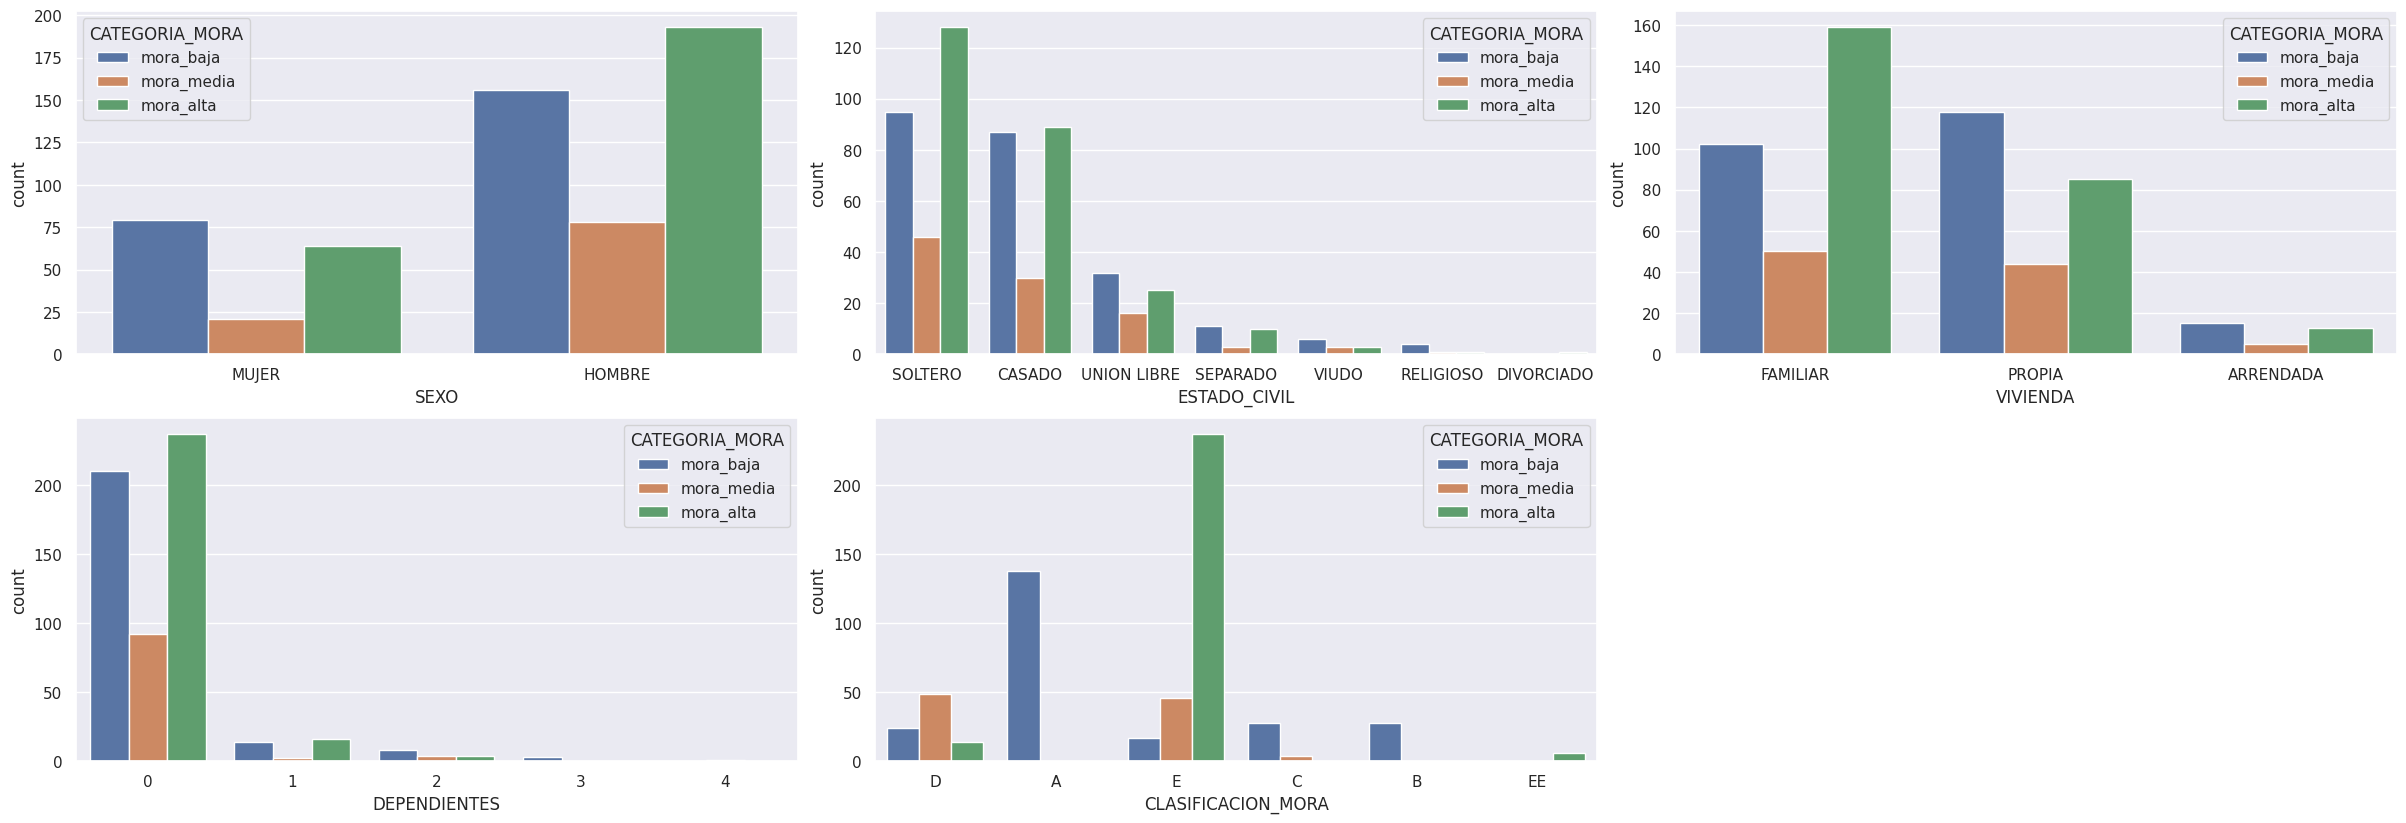

In [53]:
sns.set(rc={'figure.figsize':(24.10,8.27)})

plt.subplot(231)
sns.countplot(x="SEXO", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)

plt.subplot(232)
sns.countplot(x="ESTADO_CIVIL", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)

plt.subplot(233)
sns.countplot(x="VIVIENDA", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)

plt.subplot(234)
sns.countplot(x="DEPENDIENTES", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)

plt.subplot(235)
sns.countplot(x="CLASIFICACION_MORA", hue='CATEGORIA_MORA', data=df)
plt.tight_layout(pad=0.7)




---


**Con las gráficas anteriores, podemos concluir que:**


---


*   En la relación SEXO - CATEGORIA MORA, la mayor cantidad de clientes con mora se evidencia en el genero MASCULINO, en este genero hay un mayor porcentaje de clientes con mora alta. En el genero FEMENINO hay mayor porcentaje de clientes con mora baja

*   En la relación ESTADO CIVIL - CATEGORIA MORA,podemos observar que la mayoria de clientes en mora tienen estado civil SOLTERO donde encontramos el mayor porcentaje de mora alta y mora baja.

*   En la relación TIPO VIVIENDA - CATEGORIA MORA, la mayor cantidad de clientes en mora viven en casa familiar y hay mayor porcentaje de clientes con mora alta.

*   En la relación DEPENDIENTES - CATEGORIA MORA, la mayor parte de clientes en mora no tiene dependientes.

*   En la relación CLASIFICACIÓN MORA - CATEGORIA MORA, el mayor porcentaje de clientes en mora se encuentran con categoria E que es un estado muy alto de mora.


**Las variables numéricas fueron categorizadas para una mejor visualización y entendimiento de las gráficas.**

<Axes: xlabel='CATEGORIA_SALDO', ylabel='count'>

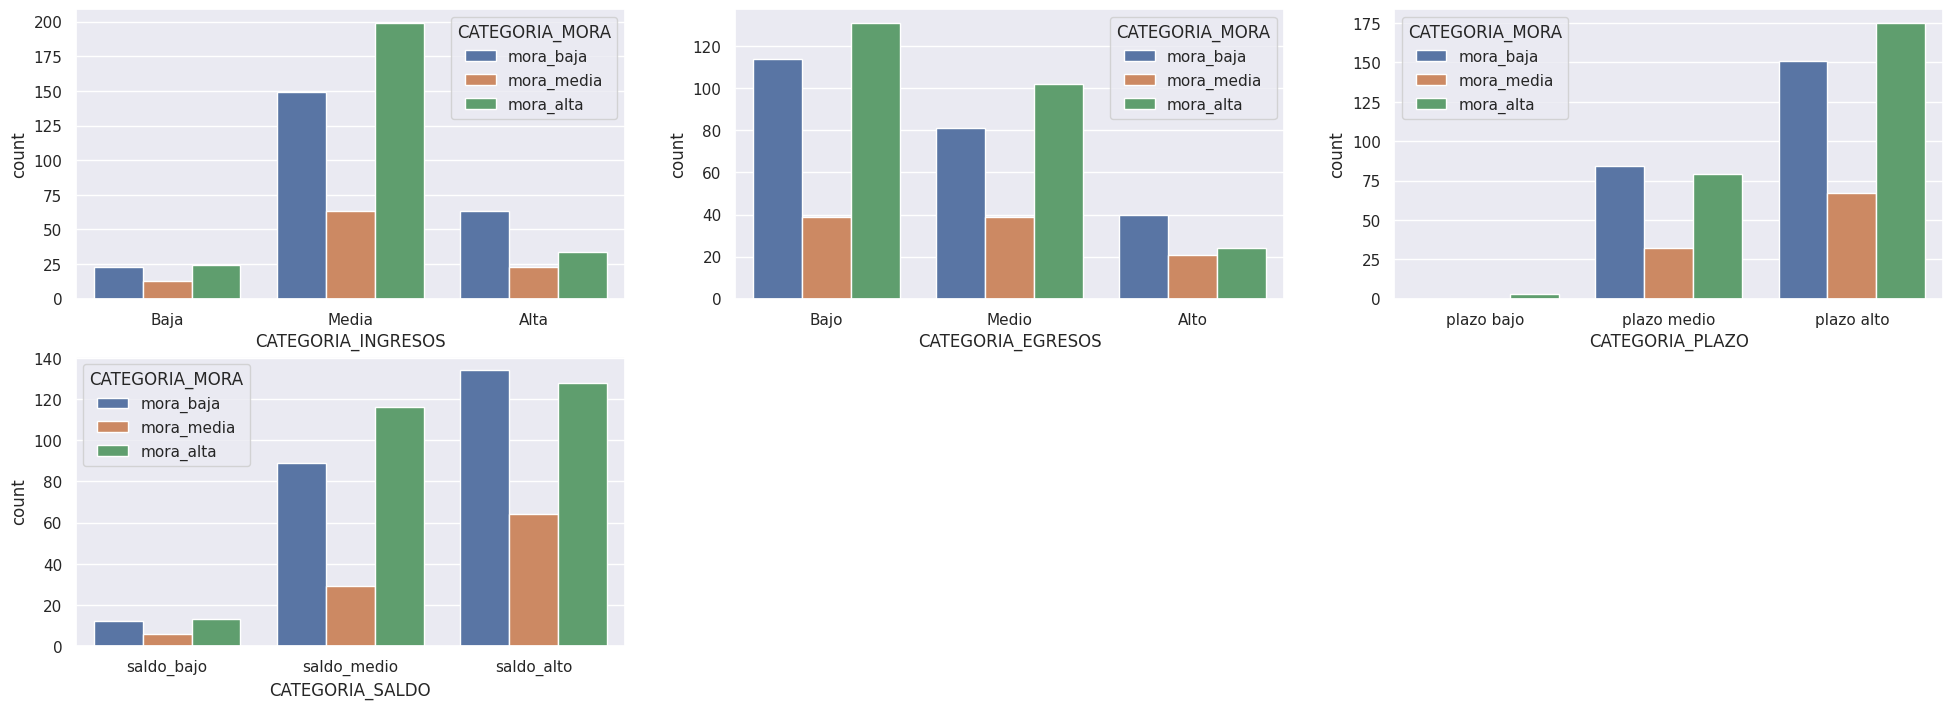

In [54]:
# bins=[-np.inf, 1.000.000, 5.000.000, np.inf], labels=['Baja', 'Media', 'Alta']
plt.subplot(231)
sns.countplot(x="CATEGORIA_INGRESOS", hue='CATEGORIA_MORA', data=df)

# bins=[-np.inf, 1.000.000, 3.000.000, np.inf], labels=['Bajo', 'Medio', 'Alto']
plt.subplot(232)
sns.countplot(x="CATEGORIA_EGRESOS", hue='CATEGORIA_MORA', data=df)

# bins=[-np.inf, 24, 60, np.inf], labels=['plazo bajo', 'plazo medio', 'plazo alto'])
plt.subplot(233)
sns.countplot(x="CATEGORIA_PLAZO", hue='CATEGORIA_MORA', data=df)

# bins=[-np.inf, 10.000.000, 50.000.000, np.inf], labels=['saldo_bajo', 'saldo_medio', 'saldo_alto'])
plt.subplot(234)
sns.countplot(x="CATEGORIA_SALDO", hue='CATEGORIA_MORA', data=df)




---


**Con las gráficas anteriores podemos concluir:**


---




*   En la relación CATEGORIA INGRESOS - CATEGORIA MORA, podemos observar que la mayor cantidad de clientes en mora tienen ingresos medios los cuales hacen parte del rango de 1.000.001 a 5.000.000. La menor cantidad de clientes en mora se muestran con ingresos bajos, es decir, de 0 a 1.000.000.

*   En la relación CATEGORIA EGRESOS - CATEGORIA MORA, podemos observar que la mayor cantidad de clientes en mora tienen egresos bajos los cuales hacen parte del rango de 1.000.001 a 3.000.000. La menor cantidad de clientes en mora se muestran con egresos altos, es decir, mayores a 3 millones.

*   En la relación CATEGORIA PLAZO - CATEGORIA MORA, podemos observar que la mayor cantidad de clientes en mora tienen creditos con plazos altos, a mas de 60 meses.




---


***Gráfico de Regresión (Regression Plot)***


---



El gráfico de regresión es similar al gráfico de dispersión, pero incluye una línea de regresión ajustada, que ayuda a visualizar la relación entre las variables.

Un gráfico de regresión es una herramienta visual para analizar la relación entre dos variables y entender cómo una variable predictora (independiente) afecta a una variable dependiente









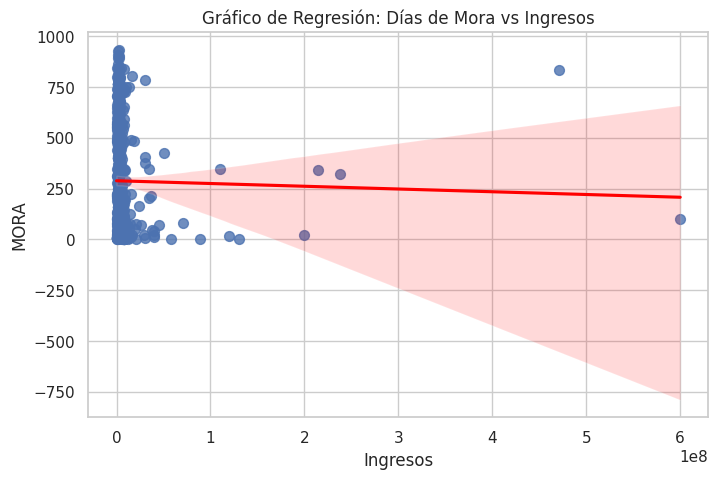

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x='INGRESOS', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('MORA')
plt.show()

**Pendiente de la Línea**: La pendiente de la línea de regresión indica la dirección y la fuerza de la relación entre las variables:

**Pendiente Positiva**: Si la línea tiene una pendiente ascendente, indica una relación positiva: a medida que aumenta la variable independiente, también lo hace la variable dependiente.

**Pendiente Negativa**: Si la línea tiene una pendiente descendente, indica una relación negativa: a medida que aumenta la variable independiente, disminuye la variable dependiente.

**Pendiente Cero**: Si la línea es horizontal, indica que no hay relación lineal entre las variables.


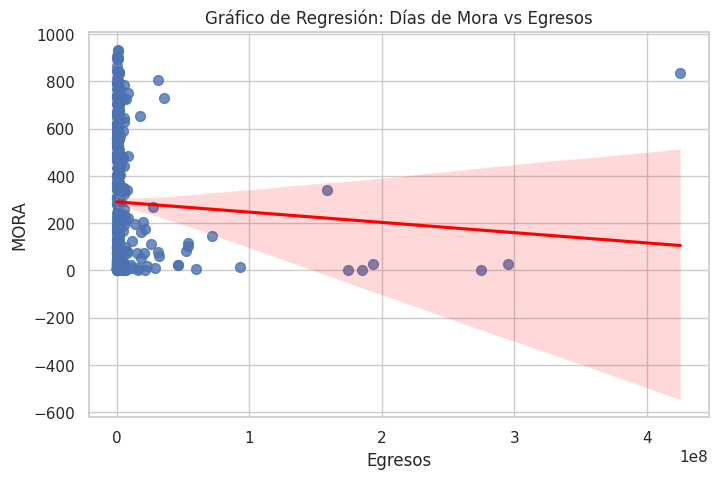

In [40]:
plt.figure(figsize=(8, 5))
sns.regplot(x='EGRESOS', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Egresos')
plt.xlabel('Egresos')
plt.ylabel('MORA')
plt.show()

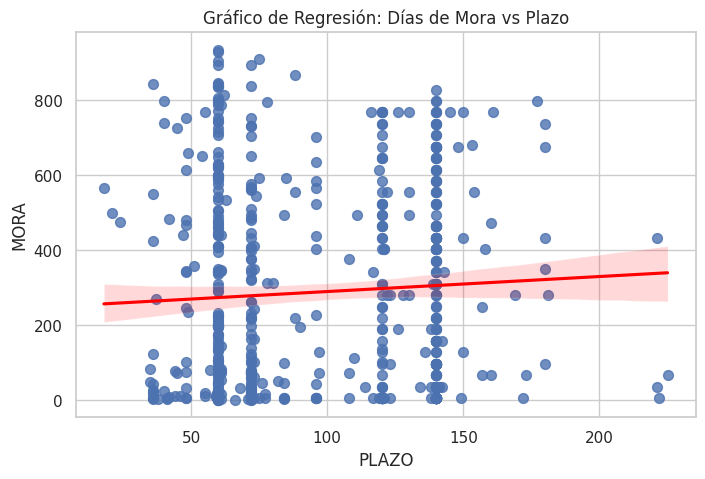

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x='PLAZO', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Plazo')
plt.xlabel('PLAZO')
plt.ylabel('MORA')
plt.show()

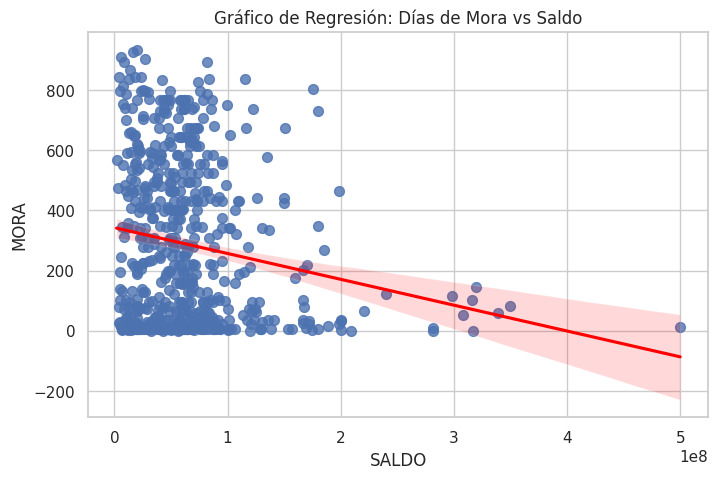

In [42]:
plt.figure(figsize=(8, 5))
sns.regplot(x='SALDO_CREDITO', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Saldo')
plt.xlabel('SALDO')
plt.ylabel('MORA')
plt.show()

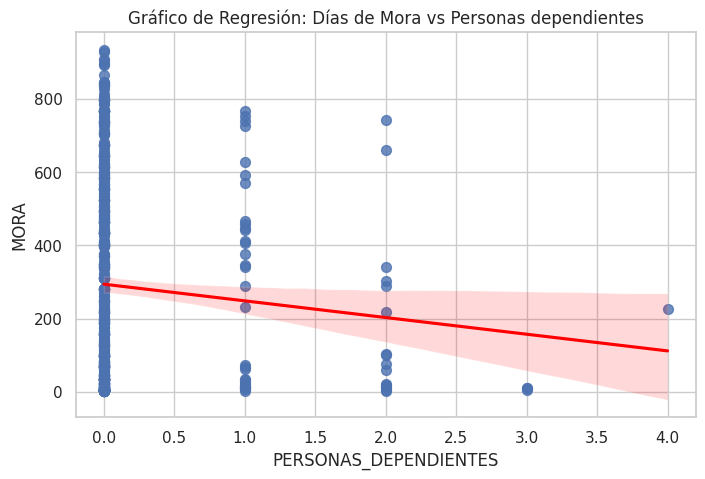

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x='DEPENDIENTES', y='MORA', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gráfico de Regresión: Días de Mora vs Personas dependientes')
plt.xlabel('PERSONAS_DEPENDIENTES')
plt.ylabel('MORA')
plt.show()



---



***Mapa de Calor de la Matriz de Correlación (Heatmap)***


---



Un mapa de calor muestra la matriz de correlación entre todas las variables. Es útil si quieres ver cómo días de mora se correlaciona con otras variables, además de ingresos.

Coeficiente de Correlación: El mapa de calor muestra el coeficiente de correlación entre pares de variables, que varía de -1 a 1

1: **Correlación positiva perfecta** (cuando una variable aumenta, la otra también lo hace de manera proporcional).

0: **Sin correlación** (no hay relación lineal entre las variables).

-1: **Correlación negativa perfecta** (cuando una variable aumenta, la otra disminuye de manera proporcional).

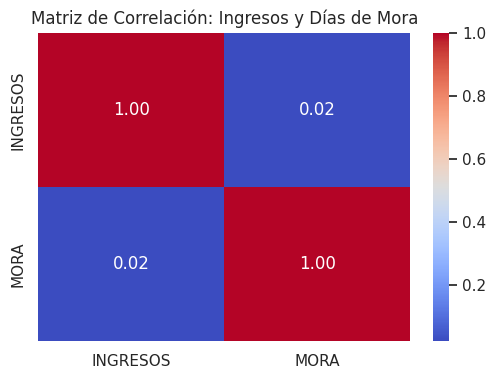

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['INGRESOS', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Ingresos y Días de Mora')
plt.show()



**Correlación entre INGRESOS y DIAS_DE_MORA:**

Valor de -0.02: Esto indica una correlación extremadamente débil entre INGRESOS y DIAS_DE_MORA. El valor cercano a 0 sugiere que no hay una relación lineal significativa entre estos dos variables.

**Negativa:** Aunque la correlación es negativa, el valor cercano a 0 significa que esta relación negativa es tan débil que es prácticamente insignificante. En otras palabras, no hay evidencia clara de que los ingresos influyan en los días de mora o viceversa.

Un coeficiente de correlación de -0.02 indica que cualquier tendencia observada es muy débil y probablemente no es significativa desde un punto de vista práctico. Los ingresos y los días de mora parecen no estar relacionados de manera sustancial en el conjunto de datos.


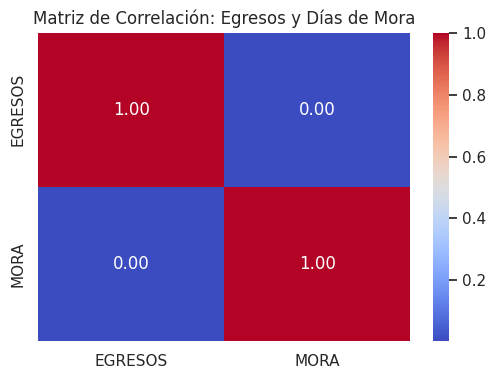

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['EGRESOS', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Egresos y Días de Mora')
plt.show()

**Correlación entre EGRESOS y DIAS_DE_MORA:**

El valor 0 significa que esta relación es tan débil que es prácticamente insignificante. En otras palabras, no hay evidencia clara de que los egresos influyan en los días de mora o viceversa.

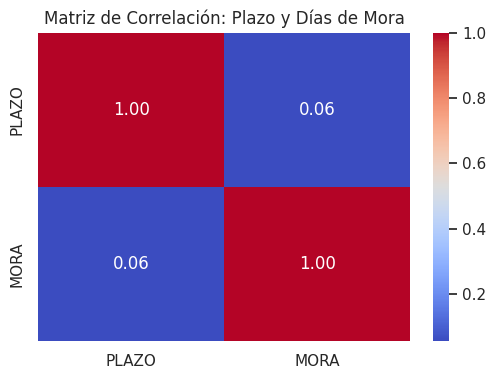

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['PLAZO', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Plazo y Días de Mora')
plt.show()

**Correlación entre PLAZO y DIAS_DE_MORA:**

Valor de -0.02: Esto indica una correlación muy débil entre el PLAZO y los DIAS_DE_MORA. El valor cercano a 0 sugiere que no hay una relación lineal significativa entre estos dos variables.

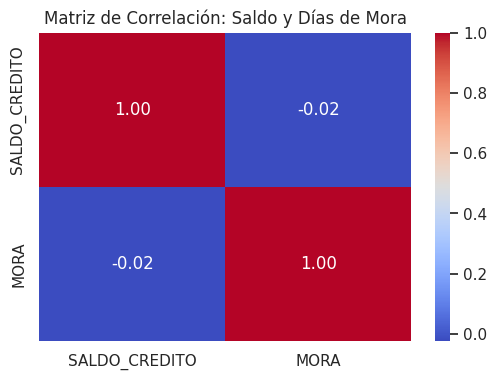

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['SALDO_CREDITO', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Saldo y Días de Mora')
plt.show()

**Correlación entre SALDO y DIAS_DE_MORA:**

Valor de -0.02: Esto indica una correlación muy débil entre el saldo y los DIAS_DE_MORA. El valor cercano a 0 sugiere que no hay una relación lineal significativa entre estos dos variables.

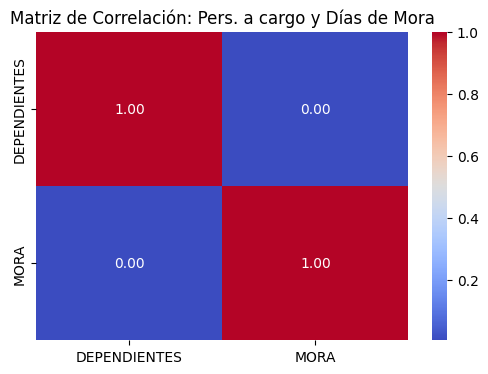

In [7]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[['DEPENDIENTES', 'MORA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Pers. a cargo y Días de Mora')
plt.show()

**Correlación entre DEPENDIENTES y DIAS_DE_MORA:**

El valor 0 significa que esta relación es tan débil que es prácticamente insignificante. En otras palabras, no hay evidencia clara de que las personas dependientes influyan en los días de mora o viceversa.



---


***BOX PLOT***


---



El box plot es menos común para mostrar la relación entre dos variables continuas, pero puede ser útil si quieres ver cómo se distribuyen los días de mora para diferentes rangos de ingresos (requiere categorización previa).

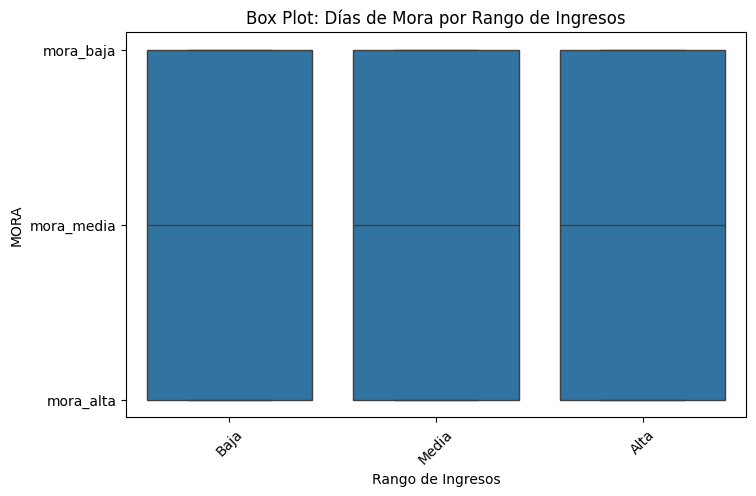

In [8]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='CATEGORIA_INGRESOS', y='CATEGORIA_MORA', data=df)
plt.title('Box Plot: Días de Mora por Rango de Ingresos')
plt.xlabel('Rango de Ingresos')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()


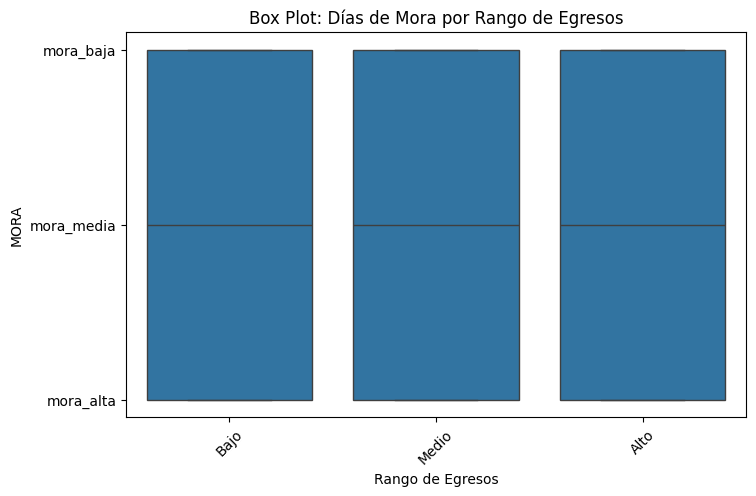

In [9]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='CATEGORIA_EGRESOS', y='CATEGORIA_MORA', data=df)
plt.title('Box Plot: Días de Mora por Rango de Egresos')
plt.xlabel('Rango de Egresos')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

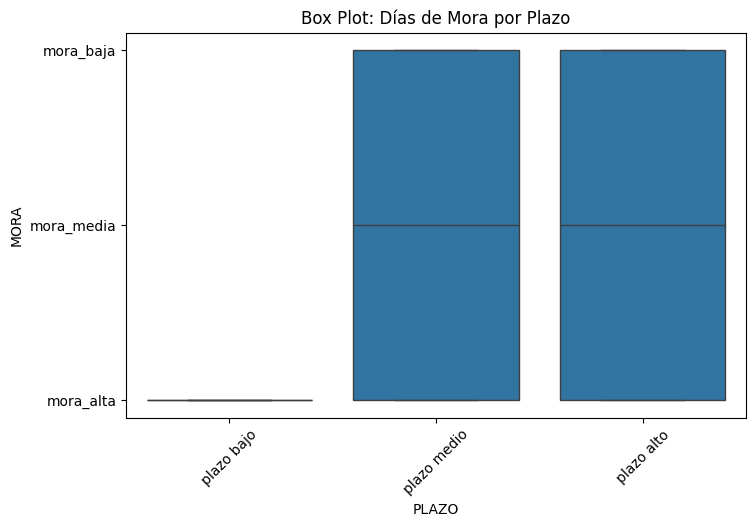

In [10]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='CATEGORIA_PLAZO', y='CATEGORIA_MORA', data=df)
plt.title('Box Plot: Días de Mora por Plazo')
plt.xlabel('PLAZO')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

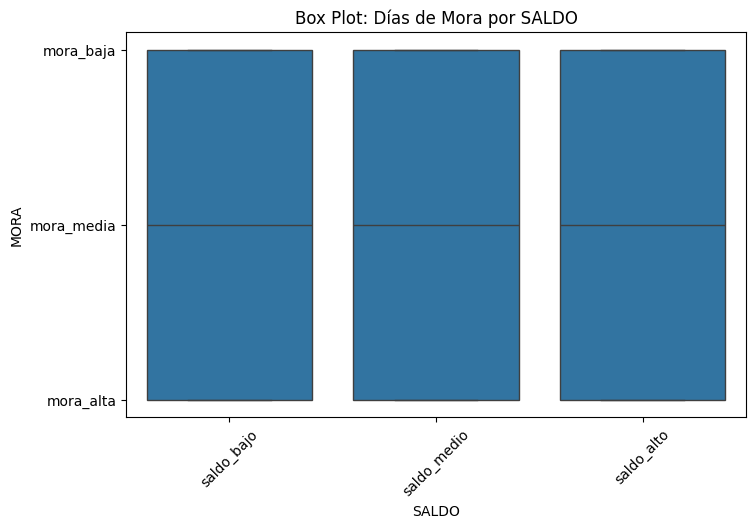

In [11]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='CATEGORIA_SALDO', y='CATEGORIA_MORA', data=df)
plt.title('Box Plot: Días de Mora por SALDO')
plt.xlabel('SALDO')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

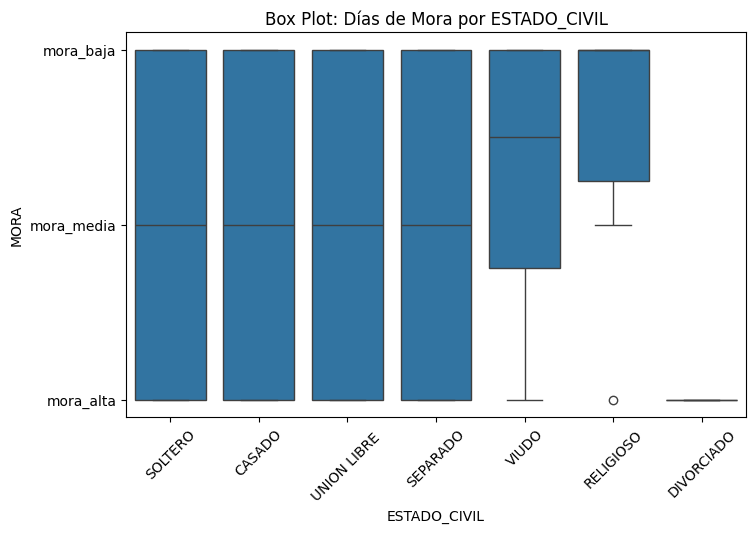

In [12]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='ESTADO_CIVIL', y='CATEGORIA_MORA', data=df)
plt.title('Box Plot: Días de Mora por ESTADO_CIVIL')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

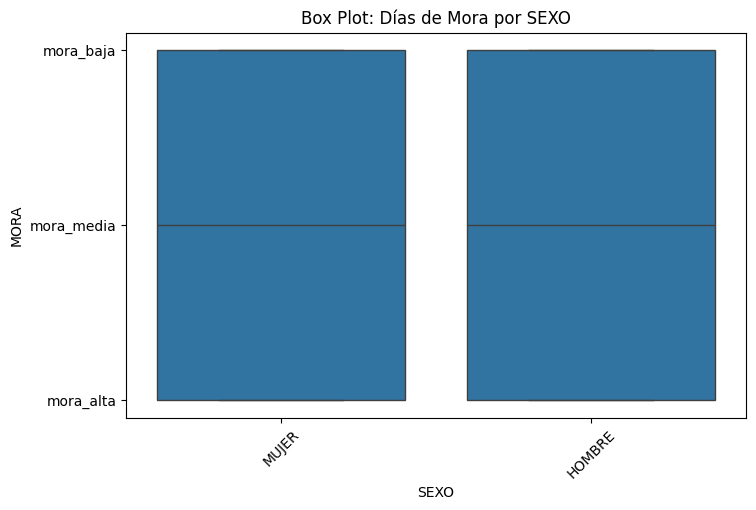

In [13]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='SEXO', y='CATEGORIA_MORA', data=df)
plt.title('Box Plot: Días de Mora por SEXO')
plt.xlabel('SEXO')
plt.ylabel('MORA')
plt.xticks(rotation=45)
plt.show()

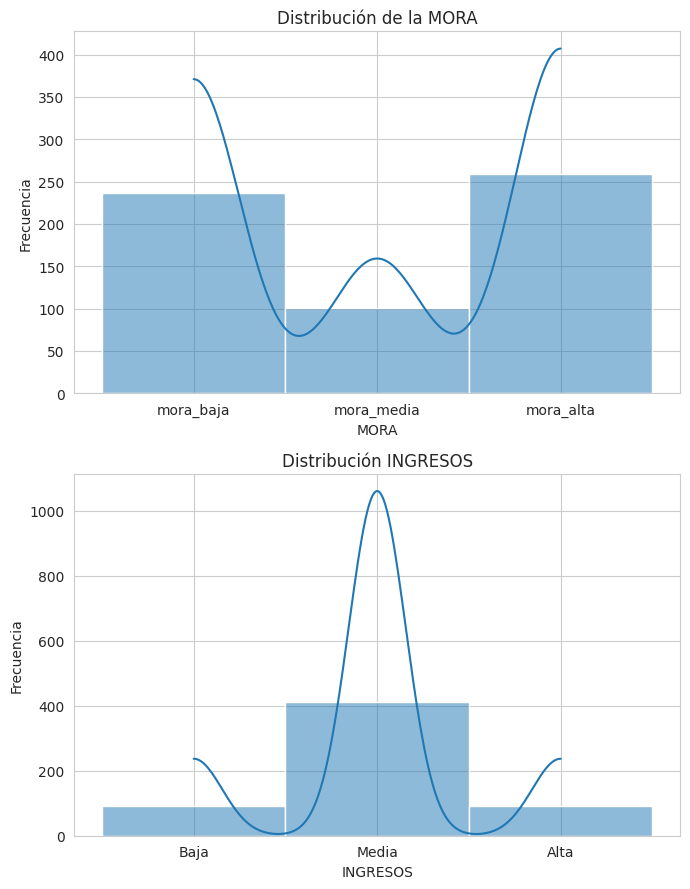

In [15]:
# Configuración del estilo de seaborn
sns.set_style("whitegrid")

# Creando la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9))

# Gráfico para 'MORA'
sns.histplot(df['CATEGORIA_MORA'], kde=True, ax=ax1)
ax1.set_title('Distribución de la MORA')
ax1.set_xlabel('MORA')
ax1.set_ylabel('Frecuencia')

# Gráfico para 'INGRESOS'
sns.histplot(df['CATEGORIA_INGRESOS'], kde=True, ax=ax2)
ax2.set_title('Distribución INGRESOS')
ax2.set_xlabel('INGRESOS')
ax2.set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


**GRAFICA DE CAJAS (BOX PLOT)**

Los gráficos de caja son útiles para visualizar la distribución y los valores atípicos en datos numéricos.

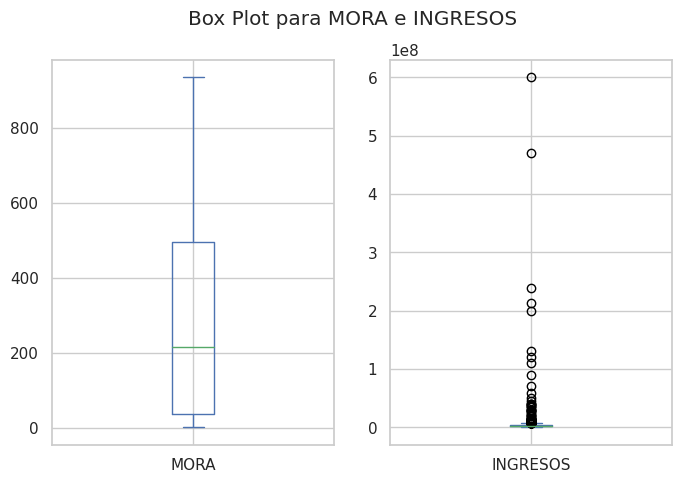

In [45]:
# Grafica de cajas para analizar los campos "MORA" e "INGRESOS"

# Este comando genera un gráfico de caja para las columnas INGRESOS y MORA del DataFrame

df[['MORA', 'INGRESOS']].plot(kind='box',
subplots=True,
layout=(1, 2),  # 1 fila, 2 columnas
sharex=False,
sharey=False,
figsize=(8, 5),
title='Box Plot para MORA e INGRESOS')

# Mostrar el gráfico
plt.show()

Con la gráfica anterior, podemos concluir lo siguiente:

MORA: La mediana de la mora corresponde a 218. No se visualizan valores atipicos.





---


***GRAFICOS PAIR PLOT***


---



El pair plot muestra la relación entre cada par de variables en un DataFrame, lo que es útil si estás interesado en explorar correlaciones múltiples.

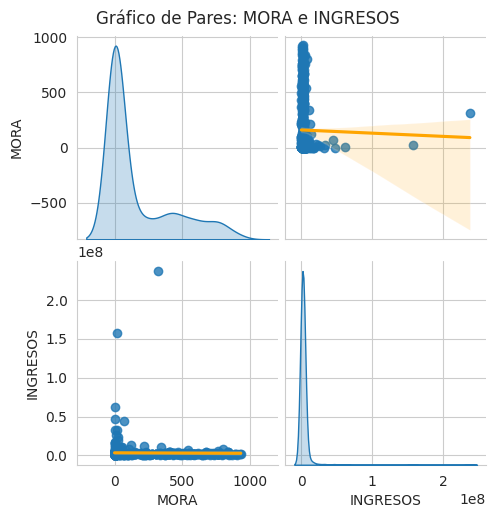

In [ ]:
# Gráfico de pares (pair plot)
sns.pairplot(df[['MORA', 'INGRESOS']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'orange'}})
plt.suptitle('Gráfico de Pares: MORA e INGRESOS', y=1.02)
plt.show()

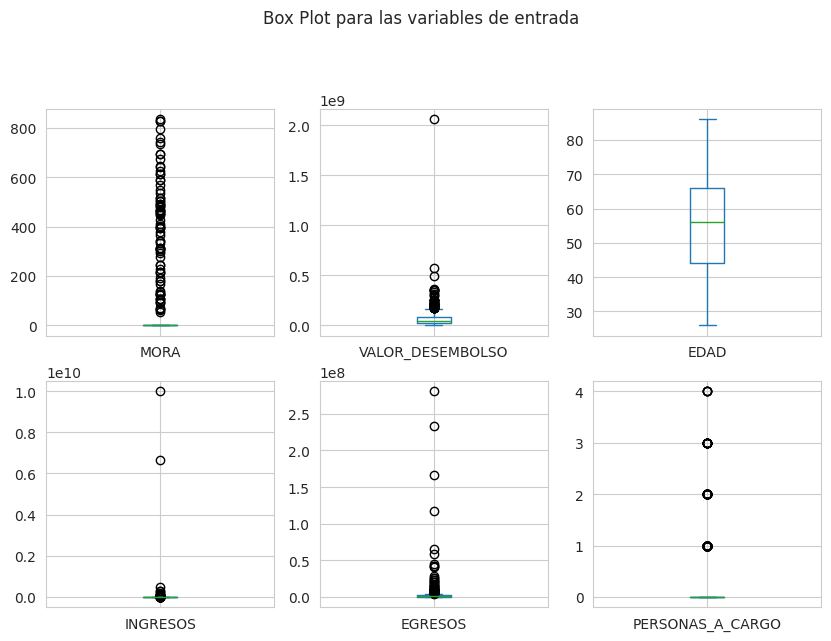

In [ ]:
df.drop('PLAZO', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10), title='Box Plot para las variables de entrada')
#plt.savefig('vino')
plt.show()

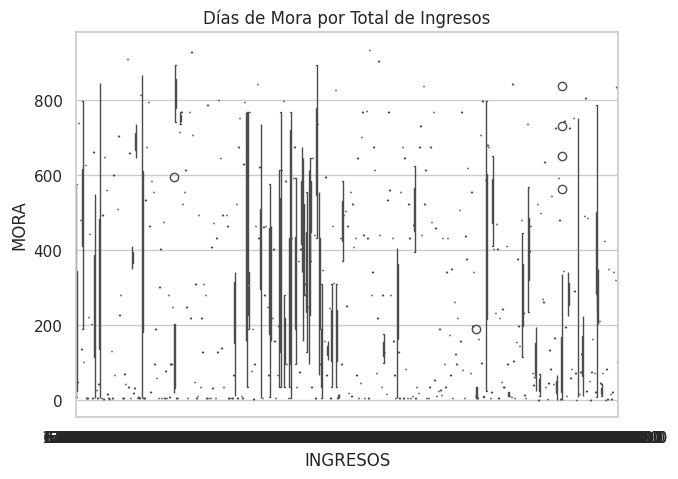

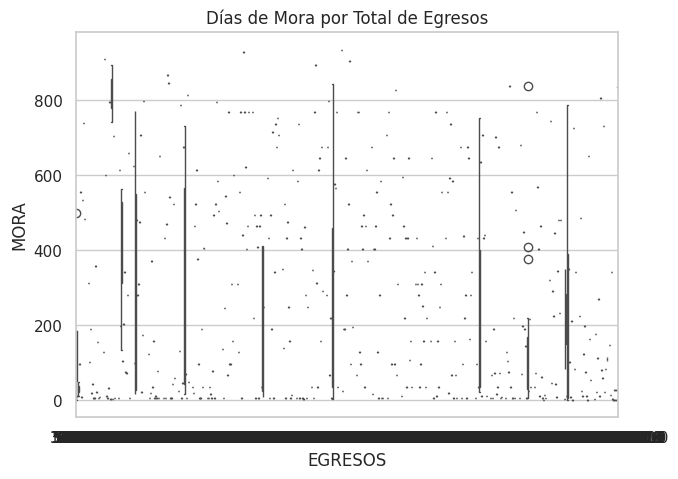

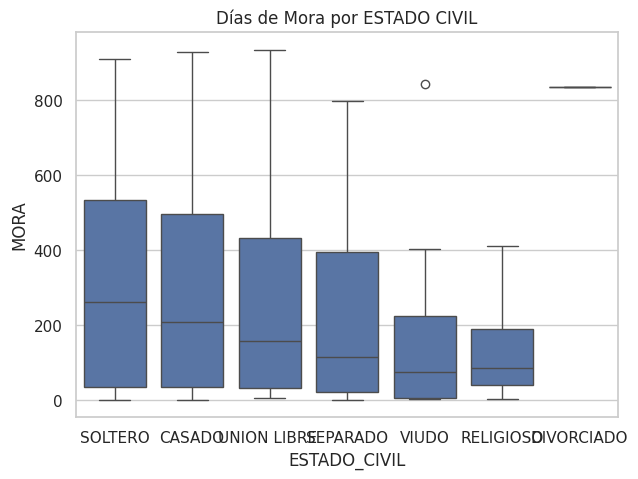

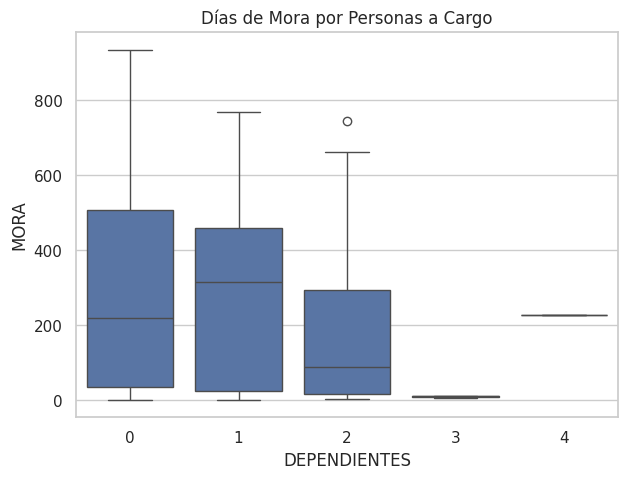

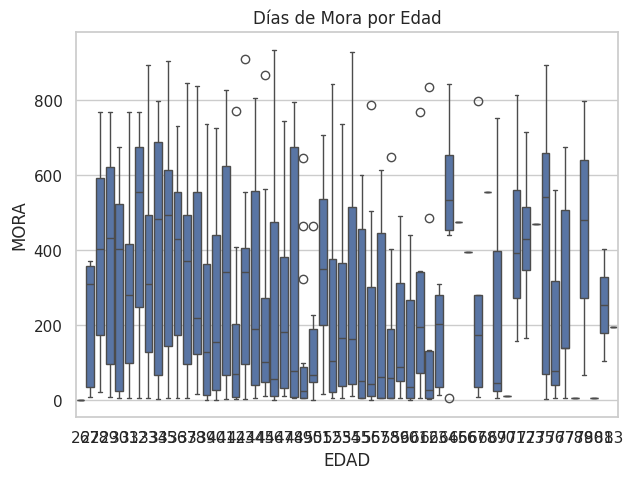

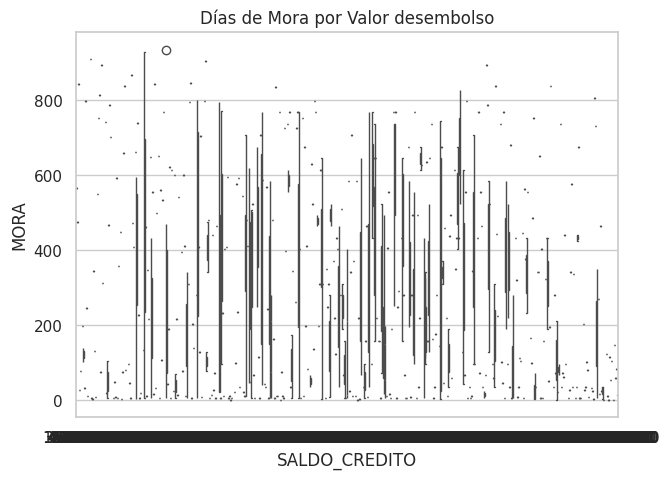

In [65]:
# Analizar cómo los días de mora varían en función de otras variables
# El boxplot muestra la distribución de datos mediante cuartiles y destaca los valores atípicos. Es útil para observar la dispersión y la simetría de los datos

# Boxplot de días de mora por Ingresos
plt.figure(figsize=(7, 5))
sns.boxplot(x='INGRESOS', y='MORA', data=df)
plt.title('Días de Mora por Total de Ingresos')
plt.xlabel('INGRESOS')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Egresos
plt.figure(figsize=(7, 5))
sns.boxplot(x='EGRESOS', y='MORA', data=df)
plt.title('Días de Mora por Total de Egresos')
plt.xlabel('EGRESOS')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Estado Civil
plt.figure(figsize=(7, 5))
sns.boxplot(x='ESTADO_CIVIL', y='MORA', data=df)
plt.title('Días de Mora por ESTADO CIVIL')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Personas a Cargo
plt.figure(figsize=(7, 5))
sns.boxplot(x='DEPENDIENTES', y='MORA', data=df)
plt.title('Días de Mora por Personas a Cargo')
plt.xlabel('DEPENDIENTES')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por Edad
plt.figure(figsize=(7, 5))
sns.boxplot(x='EDAD', y='MORA', data=df)
plt.title('Días de Mora por Edad')
plt.xlabel('EDAD')
plt.ylabel('MORA')
plt.show()

# Boxplot de días de mora por valor desembolso
plt.figure(figsize=(7, 5))
sns.boxplot(x='SALDO_CREDITO', y='MORA', data=df)
plt.title('Días de Mora por Valor desembolso')
plt.xlabel('SALDO_CREDITO')
plt.ylabel('MORA')
plt.show()

<ipython-input-125-20d7cae31287>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df_clean.groupby('CATEGORIA INGRESOS'):


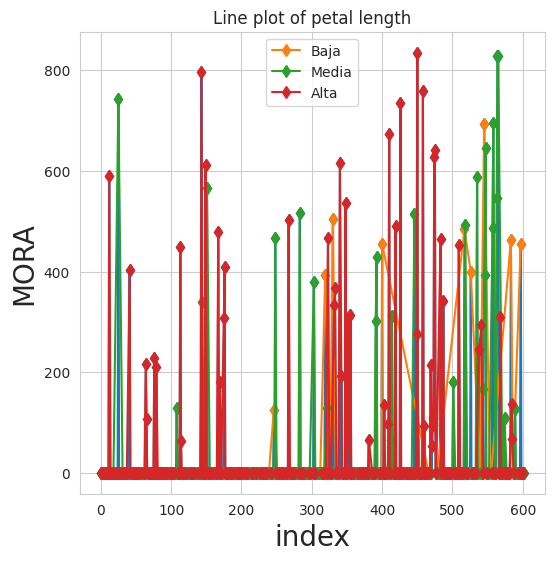

In [ ]:
# GRAFICO LINEAL (CON MARCADORES)

# visualiza los datos conectando los puntos de datos mediante segmentos de línea. Se parece a un gráfico de dispersión, pero se diferencia en que los puntos de medición están ordenados
# (normalmente por su valor en el eje x) y conectados con segmentos de línea recta.

plt.figure(figsize=(6,6))
plt.title('Line plot of petal length')
plt.xlabel('index',fontsize=20)
plt.ylabel('MORA',fontsize=20)
plt.plot(df_clean.index,df_clean['MORA'],markevery=1,marker='d')
for name, group in df_clean.groupby('CATEGORIA INGRESOS'):
    plt.plot(group.index, group['MORA'], label=name,markevery=1,marker='d')
plt.legend()
plt.show()

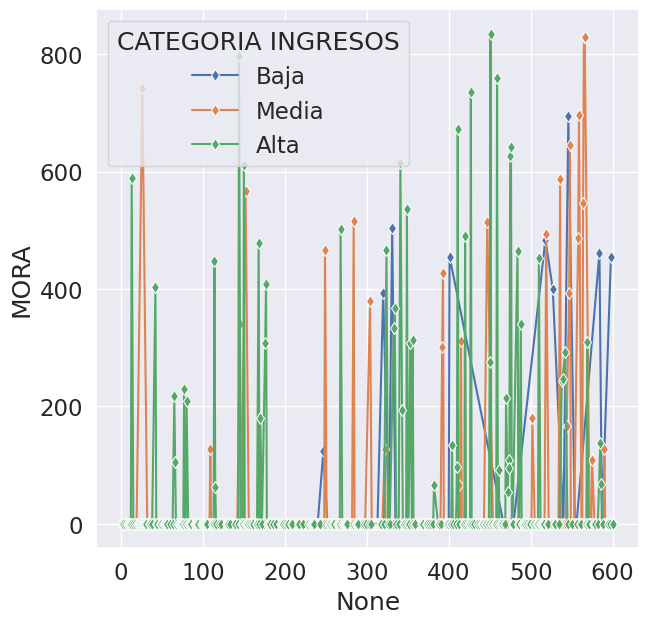

In [ ]:
# Otro ejemplo de grafico lineal por categoria de ingresos

sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

fig=sns.lineplot(x=df_clean.index,y=df_clean['MORA'],markevery=1,marker='d',data=df_clean,hue=df_clean['CATEGORIA INGRESOS'])
#fig.set(xlabel='INGRESOS')



---


# CONCLUSIONES


---

En el analisis exploratorio de los datos se evidencia que la información suministrada por la entidad financiera no está muy relacionada, es decir, no hay variables que nos lleven a una definición clara o cercana al problema que se tiene con la alta morosidad de la cartera, sin embargo, en el análisis se realizan varios ejercicios en los cuales obtenemos información que puede ser importante al momento de tomar decisiones en la apertura de la operación.

Se realiza una limpieza de la base de datos para eliminar registros que se consideran que no afectan el resultado del ejercicio y no aportan mayor detalle al analisis, campos sin información, con caracteres especiales y datos atípicos.

Como resultado obtenido despues un analisis univariado y multivariado, obtenemos la siguiente información:

La mayoria de personas con creditos en mora son de genero masculino y predomina el estado civil soltero.

La mayor parte de personas con mora tienen tipo de vivienda familiar y la menor cantidad de mora la tienen las personas que pagan arriendo.

El porcetaje mas alto de mora corresponde a las personas que no tienen despendientes.

En cuanto a los ingresos, se observo que la mayor parte de clientes en mora esta en aquellos cuyos ingresos van de 1 a 5 millones, el menor porcentaje lo tienen las personas que no ganan mas de un salario minimo.

La mayor cantidad de clientes en mora tienen creditos con plazos altos, a mas de 60 meses.






